# Using Model

In [2]:
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
model = keras.models.load_model('Face_detection.H5')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [5]:
img = cv2.imread('Data\\data\\with_mask\\2-with-mask.jpg')
img = cv2.resize(img,(224,224))

img= img.flatten()
img = img.reshape((1, 224, 224, 3))

print(img.shape)

print(model.predict(img)[0][0])
print('I dont know why this is comming instead of 0 and 1')

(1, 224, 224, 3)
1/1 [==============================] - 1s 745ms/step
6.8219363e-22
I dont know why this is comming instead of 0 and 1


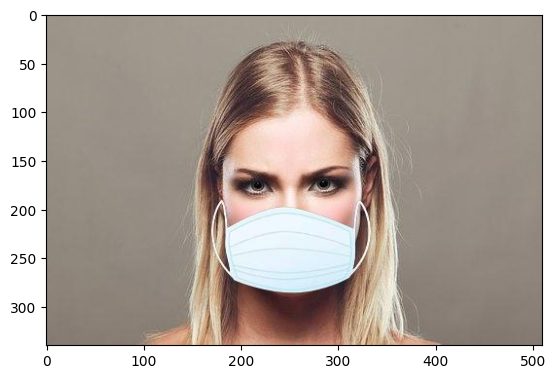

In [6]:
img = cv2.imread('Data\\data\\with_mask\\2-with-mask.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))   # Convert BGR to RGB
plt.show()

In [7]:
img = cv2.imread('Data\\data\\with_mask\\400-with-mask.jpg')
img = cv2.resize(img,(224,224))

img= img.flatten()
img = img.reshape((1, 224, 224, 3))

print(img.shape)



(1, 224, 224, 3)


## For text in Image

In [8]:
def draw_label(img,text,position,bg_color):

    text_size = cv2.getTextSize(text =text,fontFace = cv2.FONT_HERSHEY_COMPLEX,fontScale=1,thickness=cv2.BORDER_REPLICATE)

    end_X = position[0] + text_size[0][0] + 1
    end_Y = position[1] + text_size[0][0] - 1

    # cv2.rectangle(img,position,(end_X,end_Y),bg_color,cv2.FILLED)

    cv2.putText(img,text,position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),1,cv2.ACCESS_FAST)

## For prediction

In [9]:
cap = cv2.VideoCapture(0)

def detect_face_mask(img):
    y_pred = model.predict(img.reshape(1, 224, 224, 3))

    if y_pred[0][0] < 0.5:
        return 0
    else:
        return 1


## Face Detection

In [10]:
detect = cv2.CascadeClassifier('Haarcascate.xml')


In [11]:
def detect_face(img):
    rect = detect.detectMultiScale(img)
    return rect

## Camera and Prediction


In [18]:
while True:
    ret, frame = cap.read()

    frame = cv2.flip(frame, 1) # Flipping the frame horizontally
    
    img = cv2.resize(frame, (224, 224))
    rectangle = detect_face(cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY))

    for x,y,w,h in rectangle:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    

    y_pred = detect_face_mask(img)
    
    if y_pred==0:
        draw_label(frame,'Mask',(30,30),(255,0,0))
    else:
        draw_label(frame,'no Mask',(30,30),(0,0,255))

    cv2.imshow('Window', frame)

    if cv2.waitKey(1) & 0xFF == ord('x'):
        break

cv2.destroyAllWindows()


1/1 [==============================] - 0s 279ms/step
